# Capstone 2: Global Video Game Sales

In [1]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# loading previously cleaned dataframe

df = pd.read_csv('clean_df.csv')
df.head()

,index,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms
0,0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii
1,1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
2,2,Super Mario Bros.,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
3,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii
4,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii


# Exploratory Data Analysis

In [3]:
df.columns

Index(['index', 'Name', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'rating',
       'playtime', 'ratings_count', 'game_series_count', 'platforms'],
      dtype='object')

In [4]:
df = df.drop('index', axis=1)

In [5]:
df.shape

(9462, 14)

In [6]:
df.dtypes

Name                  object
Year_of_Release      float64
Genre                 object
Publisher             object
NA_Sales             float64
EU_Sales             float64
JP_Sales             float64
Other_Sales          float64
Global_Sales         float64
rating               float64
playtime               int64
ratings_count          int64
game_series_count      int64
platforms             object
dtype: object

# Part I Preparing the Data

Prepration of numerical columns:

Converting "Year_of_Release" to how long the game was released for since 2017 when the dataset was last updated.

In [7]:
df['Years_of_Release'] = 2017 - df['Year_of_Release']
df.drop(columns=['Year_of_Release'], axis=1, inplace=True)

In [8]:
df.head(10)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii,11.0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,32.0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,18.0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii,9.0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii,8.0
5,New Super Mario Bros.,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,4.13,25,179,19,Wii U||Nintendo DS,11.0
6,Wii Play,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,3.36,0,46,0,Wii,11.0
7,New Super Mario Bros. Wii,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,3.99,12,173,17,Wii,8.0
8,Duck Hunt,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.00,0,0,0,PC,33.0
9,Mario Kart DS,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,4.23,5,182,10,Nintendo DS||Wii U,12.0


Dropping sales rows with insufficient data:

In [9]:
df['Global_Sales'].value_counts().sort_index()

0.01     446
0.02     431
0.03     366
0.04     297
0.05     305
        ... 
29.81      1
32.78      1
35.57      1
40.24      1
82.54      1
Name: Global_Sales, Length: 556, dtype: int64

In [10]:
df.drop(df[df['Global_Sales'] <= 0.03].index)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii,11.0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,32.0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,18.0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii,9.0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,Sega Arcade Gallery,Misc,THQ,0.03,0.01,0.00,0.00,0.04,0.00,0,0,0,Game Boy Advance,14.0
8610,100 Classic Games,Misc,Rondomedia,0.00,0.03,0.00,0.00,0.04,0.00,0,0,0,Nintendo DS,6.0
8611,Black Stone: Magic & Steel,Role-Playing,THQ,0.03,0.01,0.00,0.00,0.04,0.00,0,0,0,Xbox,14.0
8612,Sins of a Solar Empire: Trinity,Strategy,Kalypso Media,0.00,0.03,0.00,0.01,0.04,2.80,1,15,0,PC,7.0


In [11]:
df['rating'].value_counts()

0.00    5080
4.00     142
3.50      77
3.67      67
3.33      66
        ... 
2.63       1
2.10       1
2.51       1
2.37       1
4.49       1
Name: rating, Length: 246, dtype: int64

In [12]:
df['playtime'].value_counts()

0      6405
1       638
2       419
3       293
4       266
       ... 
129       1
43        1
226       1
90        1
91        1
Name: playtime, Length: 85, dtype: int64

More than half the values of rating and playtime are missing. Ratings count isn't related. Game series count would be an unfair form of measurement because games that were recently released could have many subsequent games that have not been released yet. These columns should be dropped.

In [13]:
df.drop(columns=['rating', 'playtime', 'ratings_count', 'game_series_count'], axis=1, inplace=True)

Coverting "platforms" column to number of platforms game is offered on.

In [25]:
plat_count = df['platforms'].str.count('\|\|') + 1
print(plat_count)

0        1
1        8
2        8
3        1
4        1
        ..
9457     3
9458    10
9459     1
9460     1
9461     1
Name: platforms, Length: 9462, dtype: int64


In [27]:
df['platforms'] = plat_count

In [28]:
df.head()

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,1,11.0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,8,32.0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,8,18.0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,1,9.0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,1,8.0


Preparation of categorical data:

In [15]:
df.dtypes

Name                 object
Genre                object
Publisher            object
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
platforms            object
Years_of_Release    float64
dtype: object

In [16]:
df.nunique()

Name                5982
Genre                 12
Publisher            447
NA_Sales             358
EU_Sales             282
JP_Sales             193
Other_Sales          147
Global_Sales         556
platforms           1352
Years_of_Release      42
dtype: int64

Checking duplicates in game name.

In [43]:
name_count = df['Name'].value_counts()
name_count.head(20)

LEGO Marvel Super Heroes                         9
Ratatouille                                      9
FIFA 14                                          9
Madden NFL 08                                    9
Madden NFL 07                                    9
LEGO The Hobbit                                  8
LEGO Harry Potter: Years 5-7                     8
Angry Birds Star Wars                            8
FIFA 15                                          8
FIFA Soccer 13                                   8
Monopoly                                         8
Terraria                                         8
Cars                                             8
LEGO Jurassic World                              8
LEGO Pirates of the Caribbean: The Video Game    7
Tomb Raider: Legend                              7
Madden NFL 06                                    7
Open Season                                      7
Pro Evolution Soccer 2008                        7
Skylanders SWAP Force          

Go through each row in df, if a name appears more than once then 
- if number of times it appears is odd, take the median value 
- if number of times it appears is even, take (number of times it appears)/2 + 1

In [44]:
name_dups = name_count[name_count > 1]

for row in df: 
    

In [48]:
df[df['Name'].str.contains('LEGO Marvel Super Heroes')]

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,platforms,Years_of_Release
979,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,1.25,0.81,0.00,0.19,2.25,10,4.0
980,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.77,0.79,0.01,0.30,1.87,10,4.0
981,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.59,0.76,0.01,0.26,1.62,10,4.0
982,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.61,0.37,0.00,0.10,1.08,10,4.0
983,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.42,0.38,0.04,0.07,0.92,10,4.0
984,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.31,0.35,0.03,0.06,0.74,10,4.0
985,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.11,0.29,0.00,0.12,0.52,10,4.0
986,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.22,0.13,0.00,0.03,0.38,10,4.0
987,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.04,0.12,0.00,0.01,0.17,10,4.0


One hot encoding for genre and merging the dataframes: 

In [49]:
genre_dummies = pd.get_dummies(df['Genre'])
genre_dummies.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
df = df.merge(genre_dummies, left_index=True, right_index=True)
df.head()

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,platforms,Years_of_Release,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,1,11.0,...,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,8,32.0,...,0,0,1,0,0,0,0,0,0,0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,8,18.0,...,0,0,1,0,0,0,0,0,0,0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,1,9.0,...,0,0,0,0,1,0,0,0,0,0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,1,8.0,...,0,0,0,0,0,0,0,0,1,0


Ideas for dealing with publishers: 
- Examine publishers in top 100 games (percentage of games they published in this category)
- Sort publishers according to how many games they produced (maybe inaccurate measure?)
- one hot code according to if they appear in 0-100, 101-500, 500+ most popular games (based on global sales) 

In [56]:
pub_counts = df['Publisher'].value_counts()
pub_counts.head(50)

Electronic Arts                           994
Activision                                577
Ubisoft                                   530
THQ                                       473
Nintendo                                  411
Sony Computer Entertainment               385
Konami Digital Entertainment              385
Sega                                      379
Namco Bandai Games                        353
Take-Two Interactive                      331
Atari                                     251
Capcom                                    230
Tecmo Koei                                148
Eidos Interactive                         146
Microsoft Game Studios                    146
Acclaim Entertainment                     141
Midway Games                              140
Warner Bros. Interactive Entertainment    138
Square Enix                               136
505 Games                                 125
Vivendi Games                             123
Codemasters                       

# Part II Examining the Data

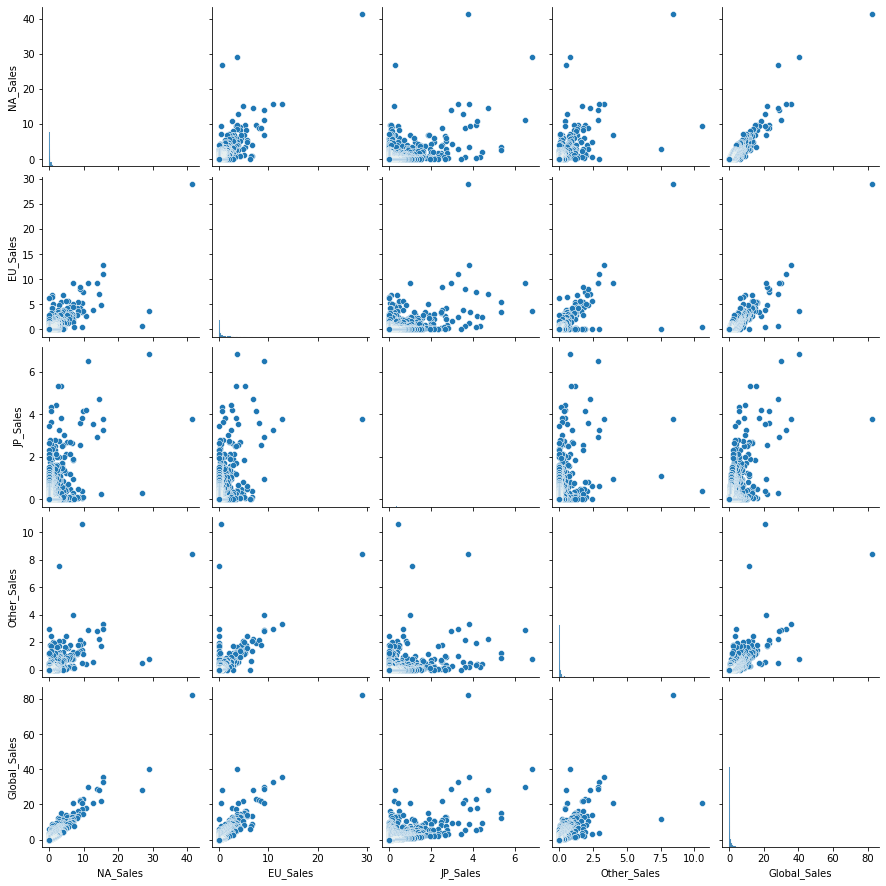

In [52]:
sns.pairplot(data=df, vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
plt.show()

Sales between different regions have postive correlations with one another.

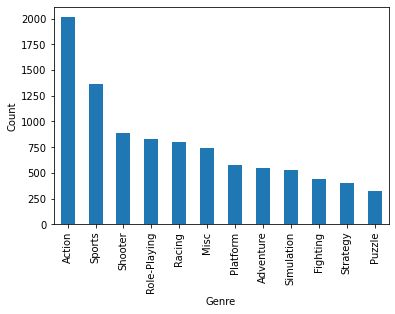

In [60]:
genre_counts = df['Genre'].value_counts()
_ = genre_counts.plot(kind='bar', xlabel='Genre', ylabel='Count')

Saving dataset for preprocessing and training 

In [59]:
df.to_csv('preprocessing.csv', index=False)